In [19]:
import evaluation as eval
import pickle as pkl
import os
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt
import numpy as np

min_list = [None, None, None, None, None]
max_list = [None, None, None, None, None]

path_results = "/home/hexa/ejmcmk/results"
folder_name = "model_convlstm_12M_pretrained_ae_v2"
n_folds = 3
fold_num = 1
folder_path = os.path.join(path_results, folder_name)
save_dir = folder_path

# get results
#losses, train_results, valid_results = eval.get_results(folder_path, n_folds, fold_num)
fold_results = eval.get_all_results(folder_path, n_folds)

In [20]:
# gather configuration info
model_info = eval.gather_info(folder_path)

Evaluation item saved to /home/hexa/ejmcmk/results/model_convlstm_12M_pretrained_ae_v2/loss_plots/model_convlstm_12M_pretrained_ae_v2.pdf


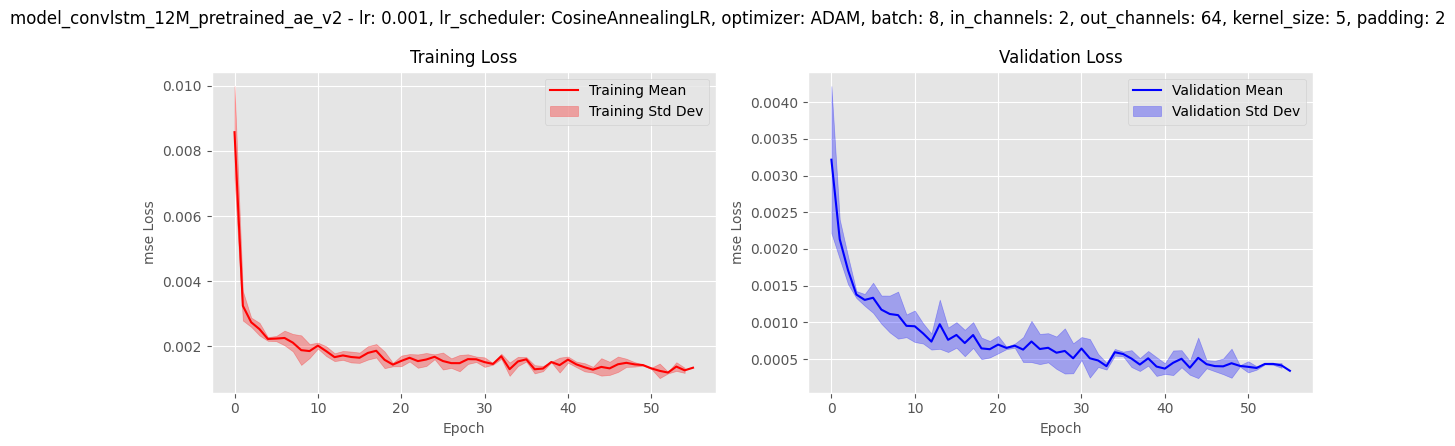

In [21]:
eval.plot_loss(model_info, fold_results, min_list, max_list, save_fig=True, save_dir=save_dir)

In [22]:
eval.print_metrics(fold_results, dataset='train', save_fig=True, save_dir=save_dir)
eval.print_metrics(fold_results, dataset='valid', save_fig=True, save_dir=save_dir)

Average Metrics for All Folds - Train Dataset:
MAE: 0.0170 ± 0.0038
RMSE: 0.0222 ± 0.0045
Correlation: 0.9932 ± 0.0034
PSNR: 33.2595 ± 1.6968
SSIM: 0.0000 ± 0.0000
Evaluation item saved to /home/hexa/ejmcmk/results/model_convlstm_12M_pretrained_ae_v2/performance_metrics/train_metrics.txt
Average Metrics for All Folds - Valid Dataset:
MAE: 0.0171 ± 0.0038
RMSE: 0.0223 ± 0.0045
Correlation: 0.9931 ± 0.0033
PSNR: 33.1955 ± 1.6728
SSIM: 0.0000 ± 0.0000
Evaluation item saved to /home/hexa/ejmcmk/results/model_convlstm_12M_pretrained_ae_v2/performance_metrics/valid_metrics.txt


/home/hexa/ejmcmk/code/near_field_inverse_design/evaluation/evaluation.py:438: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  fig.tight_layout()


Evaluation item saved to /home/hexa/ejmcmk/results/model_convlstm_12M_pretrained_ae_v2/dft_plots/Best Performing Fold - Fold 2 - Random Training Sample - polar_dft_sample_idx_10_polar.pdf


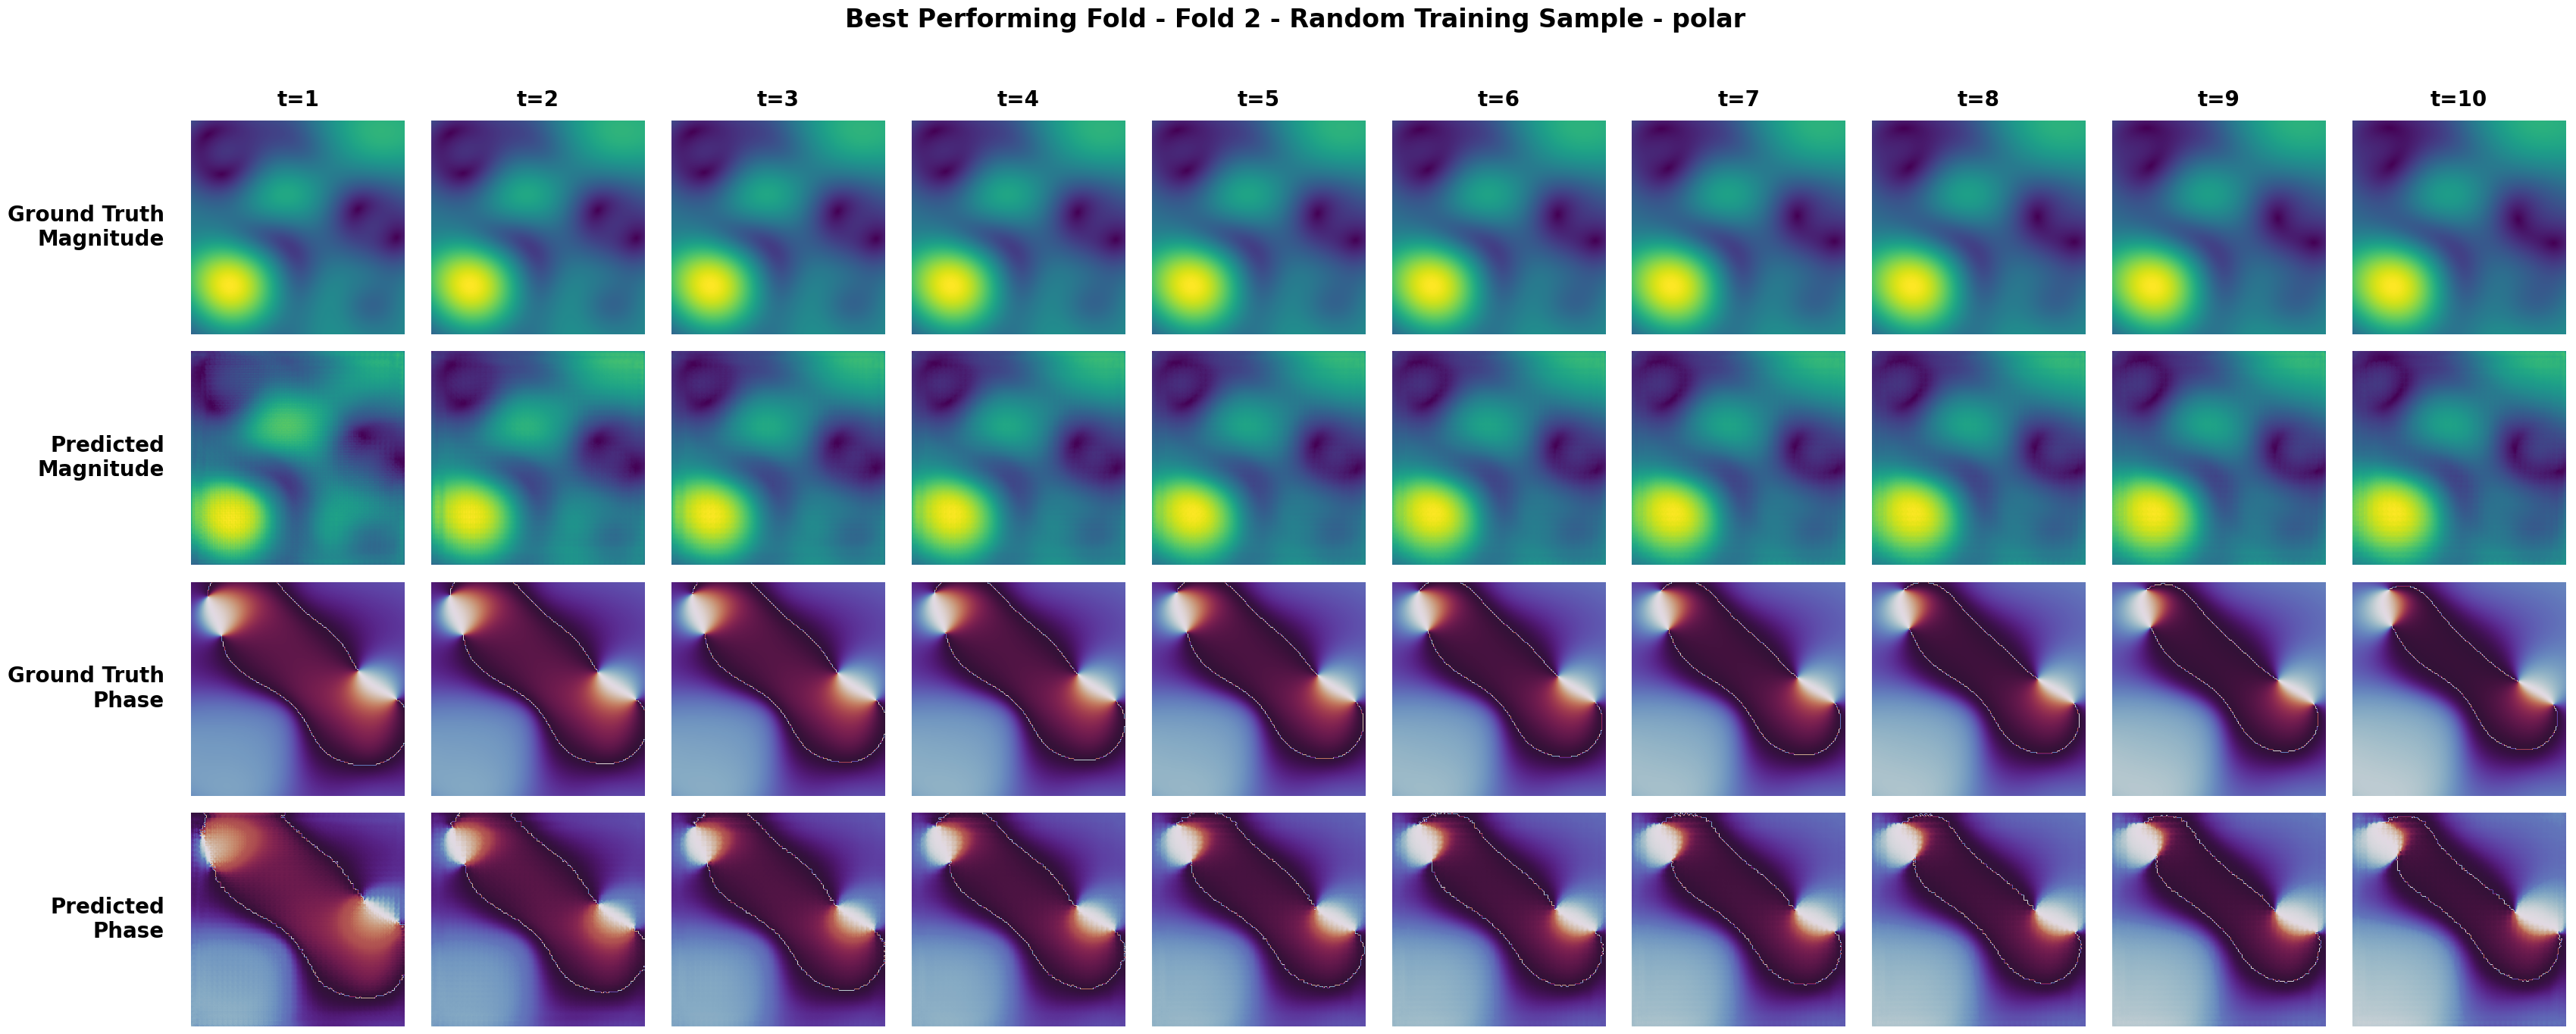

/home/hexa/ejmcmk/code/near_field_inverse_design/evaluation/evaluation.py:438: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  fig.tight_layout()


Evaluation item saved to /home/hexa/ejmcmk/results/model_convlstm_12M_pretrained_ae_v2/dft_plots/Best Performing Fold - Fold 2 - Random Validation Sample - polar_dft_sample_idx_10_polar.pdf


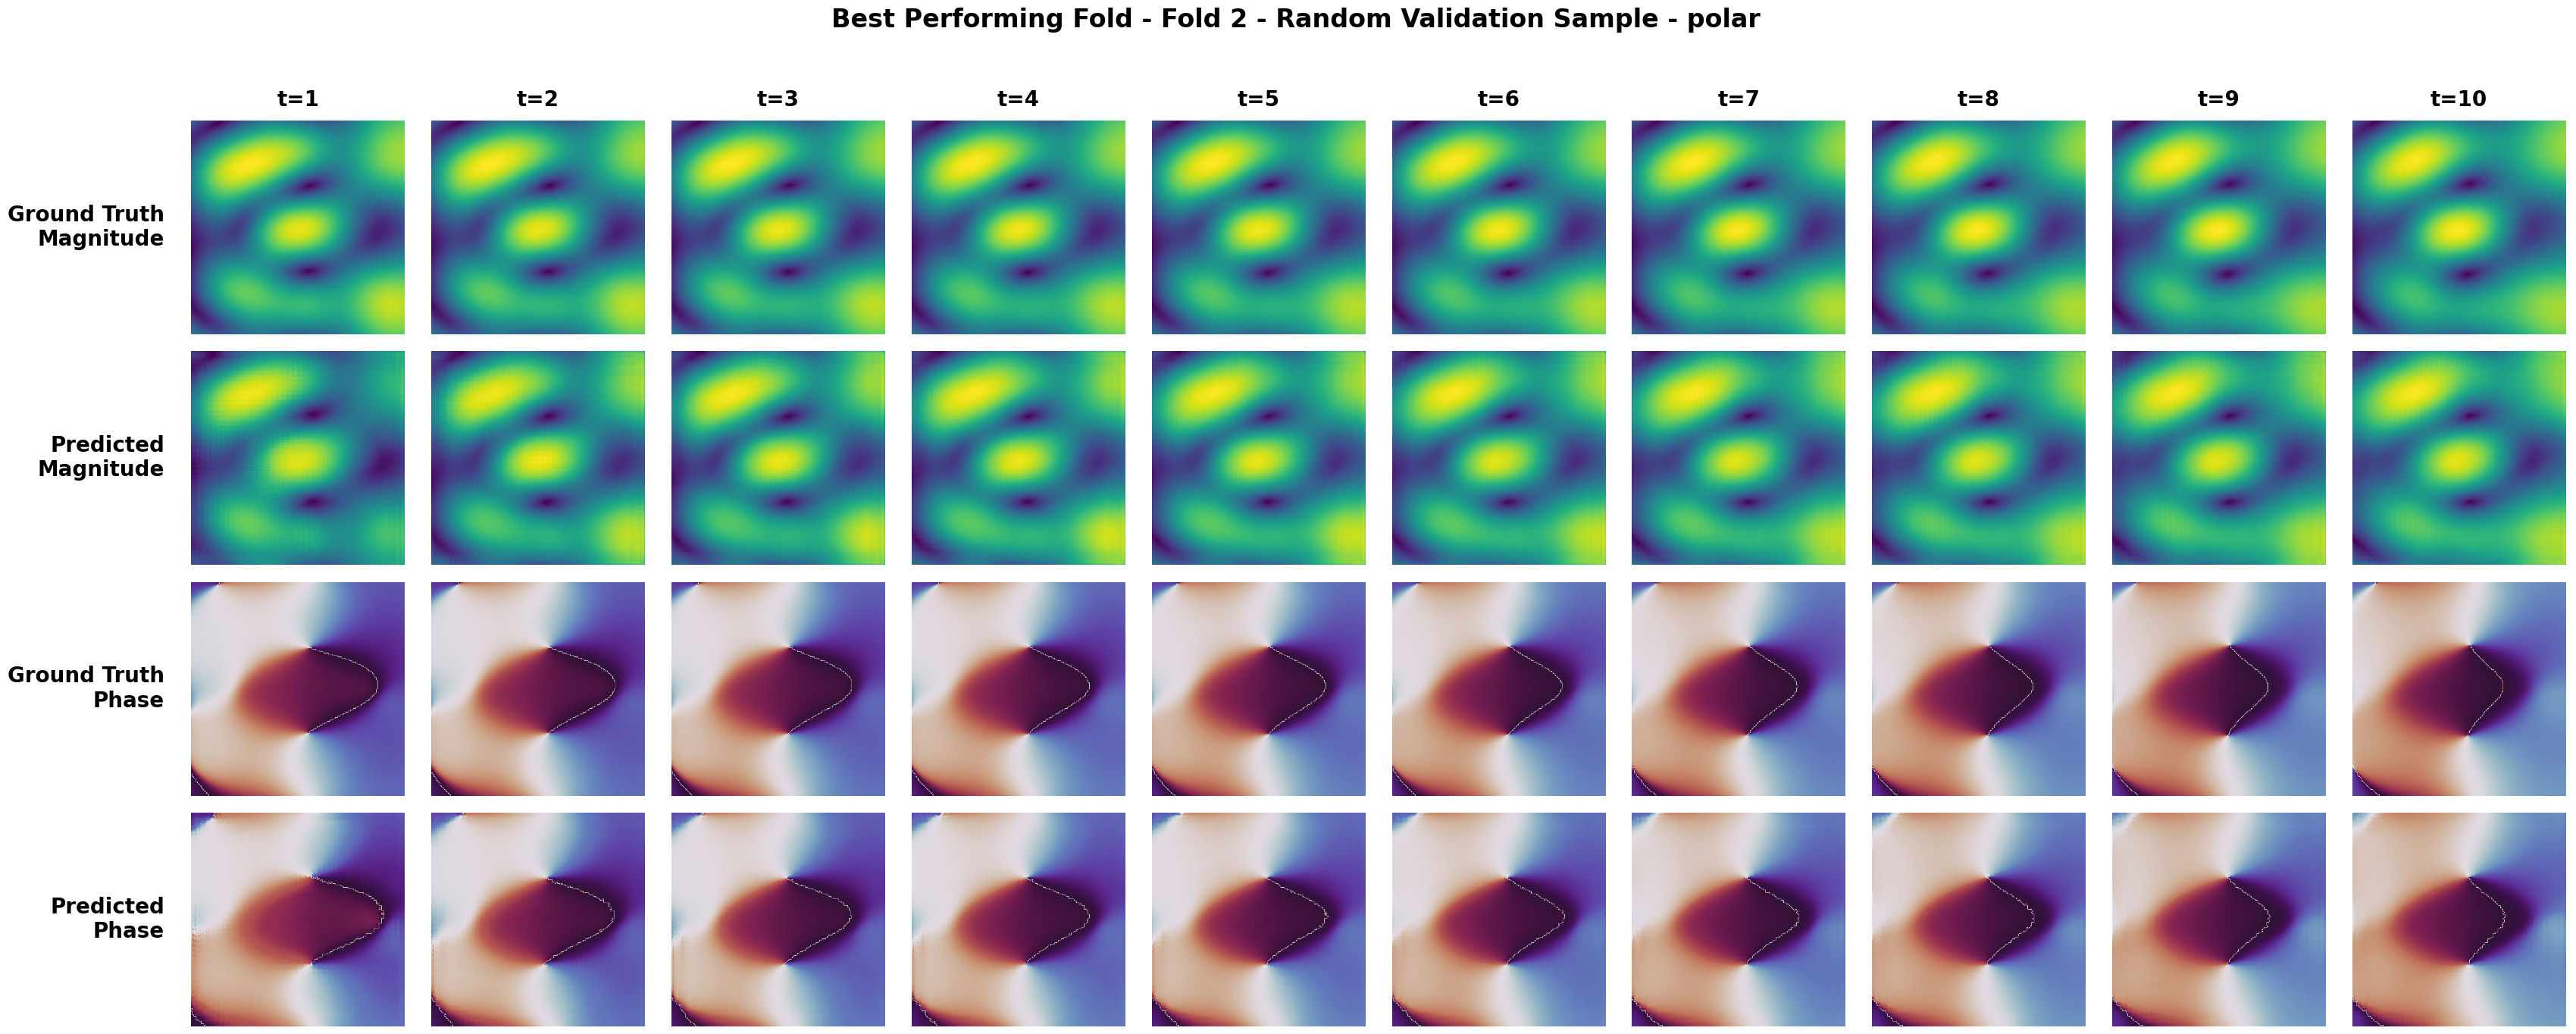

In [25]:
plt.close('all')

#eval.plot_dft_fields(fold_results, fold_idx=1, plot_type="specific", sample_idx=0, save_fig=True, save_dir=save_dir, arch='lstm', format='polar')
eval.plot_dft_fields(fold_results, plot_type="best", sample_idx=10, save_fig=True, save_dir=save_dir, arch='lstm', format='polar')

In [24]:
# animate true intensity and pred intensity
#import sys
#sys.path.append('../')
import torch
import utils.visualize as viz
from utils import mapping

sample_idx = 0
dataset = 'valid'
results = fold_results[0][dataset]
truth_real = torch.from_numpy(results['nf_truth'][sample_idx, :, 0, :, :])
truth_imag = torch.from_numpy(results['nf_truth'][sample_idx, :, 1, :, :])
pred_real = torch.from_numpy(results['nf_pred'][sample_idx, :, 0, :, :])
pred_imag = torch.from_numpy(results['nf_pred'][sample_idx, :, 1, :, :])
truth_real = truth_real.permute(1, 2, 0)
truth_imag = truth_imag.permute(1, 2, 0)
pred_real = pred_real.permute(1, 2, 0)
pred_imag = pred_imag.permute(1, 2, 0)

truth_mag, truth_phase = mapping.cartesian_to_polar(truth_real, truth_imag)
pred_mag, pred_phase = mapping.cartesian_to_polar(pred_real, pred_imag)
#print(truth_real.shape, pred_real.shape)

flipbooks_dir = os.path.join(save_dir, "flipbooks")
os.makedirs(flipbooks_dir, exist_ok=True)

# intensity
truth_anim = viz.animate_fields(truth_mag, "True Intensity", 
                                save_path=os.path.join(flipbooks_dir, f"sample_{sample_idx}_intensity_groundtruth_{dataset}.gif"), 
                                frames=10,
                                interval=250)
pred_anim = viz.animate_fields(pred_mag, "Predicted Intensity", 
                               save_path=os.path.join(flipbooks_dir, f"sample_{sample_idx}_intensity_prediction_{dataset}.gif"), 
                               frames=10,
                               interval=250)

# phase
truth_phase_anim = viz.animate_fields(truth_phase, "True Phase", 
                                save_path=os.path.join(flipbooks_dir, f"sample_{sample_idx}_phase_groundtruth_{dataset}.gif"), 
                                cmap='twilight_shifted',
                                frames=10,
                                interval=250)
pred_phase_anim = viz.animate_fields(pred_phase, "Predicted Phase", 
                               save_path=os.path.join(flipbooks_dir, f"sample_{sample_idx}_phase_prediction_{dataset}.gif"), 
                               cmap='twilight_shifted',
                               frames=10,
                               interval=250)

